# projet

# partie1 deep autoencodeur 

In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
# configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy','mse','mae'])
(x_train, _), (x_test, _) = mnist.load_data()
# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print( x_test.shape)
history=autoencoder.fit(x_train, x_train,
epochs=100,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
autoencoder.save('autoenc_deepe.h5')



(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 157us/step - loss: 0.3715 - accuracy: 0.7420 - mse: 0.1031 - mae: 0.2371 - val_loss: 0.2710 - val_accuracy: 0.7957 - val_mse: 0.0685 - val_mae: 0.1574
Epoch 2/100
60000/60000 [==============================] - 12s 203us/step - loss: 0.2633 - accuracy: 0.7974 - mse: 0.0656 - mae: 0.1528 - val_loss: 0.2520 - val_accuracy: 0.7957 - val_mse: 0.0617 - val_mae: 0.1460
Epoch 3/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.2410 - accuracy: 0.7970 - mse: 0.0573 - mae: 0.1390 - val_loss: 0.2285 - val_accuracy: 0.7964 - val_mse: 0.0531 - val_mae: 0.1300
Epoch 4/100
60000/60000 [==============================] - 12s 194us/step - loss: 0.2212 - accuracy: 0.7967 - mse: 0.0504 - mae: 0.1250 - val_loss: 0.2120 - val_accuracy: 0.7970 - val_mse: 0.0476 - val_mae: 0.1181
Epoch 5/100
60000/60000 [==============================] - 7s 116us/st

Epoch 61/100
60000/60000 [==============================] - 8s 125us/step - loss: 0.0961 - accuracy: 0.8140 - mse: 0.0108 - mae: 0.0357 - val_loss: 0.0947 - val_accuracy: 0.8131 - val_mse: 0.0104 - val_mae: 0.0350
Epoch 91/100
60000/60000 [==============================] - 13s 221us/step - loss: 0.0961 - accuracy: 0.8140 - mse: 0.0108 - mae: 0.0357 - val_loss: 0.0946 - val_accuracy: 0.8132 - val_mse: 0.0104 - val_mae: 0.0348
Epoch 92/100
60000/60000 [==============================] - 12s 197us/step - loss: 0.0960 - accuracy: 0.8140 - mse: 0.0108 - mae: 0.0357 - val_loss: 0.0945 - val_accuracy: 0.8132 - val_mse: 0.0104 - val_mae: 0.0348
Epoch 93/100
60000/60000 [==============================] - 8s 126us/step - loss: 0.0960 - accuracy: 0.8140 - mse: 0.0108 - mae: 0.0356 - val_loss: 0.0945 - val_accuracy: 0.8131 - val_mse: 0.0104 - val_mae: 0.0348
Epoch 94/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.0959 - accuracy: 0.8140 - mse: 0.0108 - mae: 0.0356 - val_

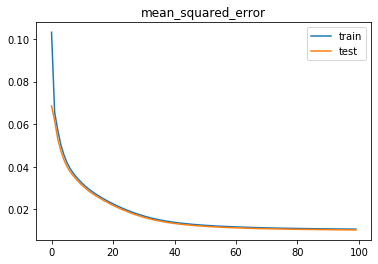

In [3]:
import matplotlib.pyplot as plt

plt.title('mean_squared_error')
plt.plot(history.history['mse'],label='train')
plt.plot(history.history['val_mse'],label='test')
# axis labels
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()

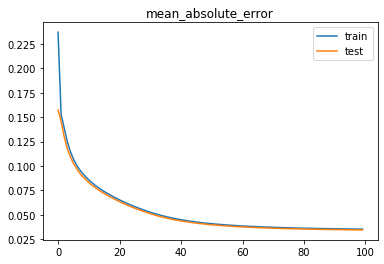

In [4]:
plt.title('mean_absolute_error')

plt.plot(history.history['mae'],label='train')
plt.plot(history.history['val_mae'],label='test')
# axis labels
plt.xlabel('epoch')
plt.ylabel('mean_absolute_error')
plt.legend()

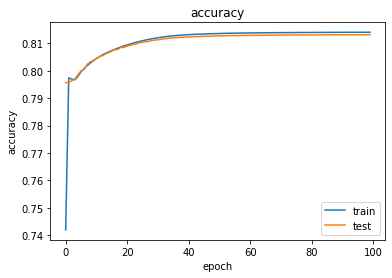

In [6]:
plt.title('accuracy')

plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
# axis labels
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

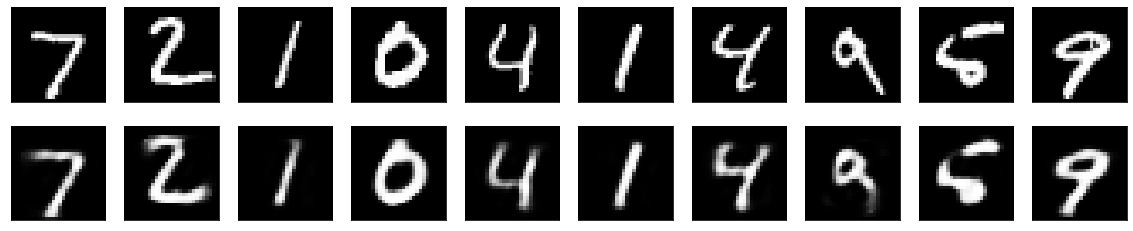

In [7]:
decoded_imgs = autoencoder.predict(x_test)
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
# display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



# partie2 autoencodeur convolutif

In [8]:
import numpy as np

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


In [9]:
import numpy as np
from tensorflow import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist

# import MNIST dataset
input_img = Input(shape=(28, 28, 1)) # adapt this if using `channels_first`
x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy','mse','mae'])
autoencoder.summary()
# Fit the model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # adapt this if using
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) # adapt this if using

history=autoencoder.fit(x_train, x_train,
 epochs=100,
 batch_size=256,
 shuffle=True,
 validation_data=(x_test, x_test))
autoencoder.save('autoenc_conv.h5')



Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 4)         292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           148       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 4)           0   

Epoch 29/100
60000/60000 [==============================] - 327s 5ms/step - loss: 0.1343 - accuracy: 0.8053 - mse: 0.0243 - mae: 0.0635 - val_loss: 0.1324 - val_accuracy: 0.8072 - val_mse: 0.0237 - val_mae: 0.0614
Epoch 30/100
60000/60000 [==============================] - 308s 5ms/step - loss: 0.1339 - accuracy: 0.8055 - mse: 0.0242 - mae: 0.0632 - val_loss: 0.1337 - val_accuracy: 0.8012 - val_mse: 0.0242 - val_mae: 0.0647
Epoch 31/100
60000/60000 [==============================] - 358s 6ms/step - loss: 0.1336 - accuracy: 0.8055 - mse: 0.0241 - mae: 0.0630 - val_loss: 0.1302 - val_accuracy: 0.8065 - val_mse: 0.0229 - val_mae: 0.0607
Epoch 32/100
60000/60000 [==============================] - 3059s 51ms/step - loss: 0.1328 - accuracy: 0.8057 - mse: 0.0238 - mae: 0.0624 - val_loss: 0.1311 - val_accuracy: 0.8032 - val_mse: 0.0232 - val_mae: 0.0625
Epoch 33/100
60000/60000 [==============================] - 285s 5ms/step - loss: 0.1326 - accuracy: 0.8058 - mse: 0.0237 - mae: 0.0622 - val_

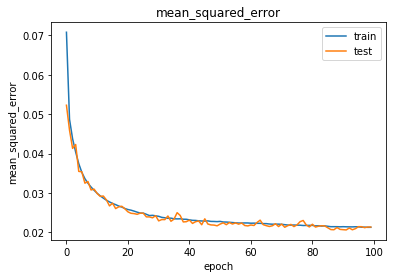

In [14]:

import matplotlib.pyplot as plt

plt.title('mean_squared_error')
plt.plot(history.history['mse'],label='train')
plt.plot(history.history['val_mse'],label='test')
# axis labels
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()




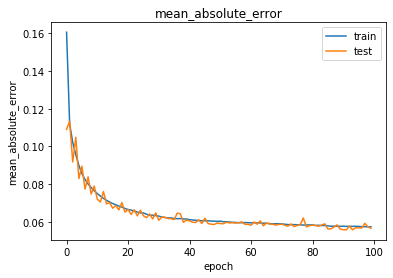

In [15]:
plt.title('mean_absolute_error')

plt.plot(history.history['mae'],label='train')
plt.plot(history.history['val_mae'],label='test')
# axis labels
plt.xlabel('epoch')
plt.ylabel('mean_absolute_error')
plt.legend()

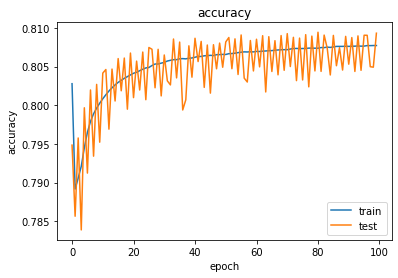

In [16]:
plt.title('accuracy')

plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
# axis labels
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

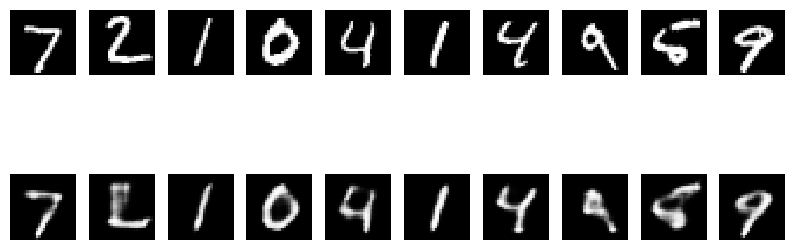

In [17]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    # display noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()
    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()
plt.show()